# PE Q26-50

In [11]:
%run PE_pre_running.py

## PE 26

In [ ]:
def pythagoreanTriplets3(limits) : 
	a, b, c, m = 0, 0, 0, 2
	triplet_sums=[]
	while a+b+c < limits : 
		for n in range(1, m) : 
			a = m * m - n * n 
			b = 2 * m * n 
			c = m * m + n * n
			if a+b+c > limits : 
				break
			triplet_sums.append(a+b+c)
			# print(a, b, c)
		m = m + 1
	print(triplet_sums)

In [ ]:
# functions 26-50
def pythagoreanTriplets2(limits):
	a, b, c, m = 0, 0, 0, 2
	triplet_sums=[]
	while a+b+c < limits:
		a=2*m
		b=m**2-1 
		c=m**2+1 
		if a+b+c > limits: 
			break
		triplet_sums.append(a+b+c)
		# print(a,b,c)
		m+=1
	print(triplet_sums)

In [ ]:
(* 26 *)
(* learn 4 functions: 
    Association[]
    Module[]
    KeyExistsQ[]
    Mod[] *)
cycleLength[d_] := Module[{rems = Association[], num = 1, pos = 1},
  While[! KeyExistsQ[rems, num] && num != 0,
    rems[num] = pos;
    num = Mod[10 num, d];
    pos++   ];
  If[num == 0, 0, pos - rems[num]]];

SortBy[Range[888, 999], cycleLength]
cycleLength[983]

{900, 960, 990, 888, 925, 999, 909, 984, 896, 910, 924, 936, 945, 962, 975, 956, 902, 
 
>   948, 954, 930, 992, 935, 891, 912, 950, 988, 920, 968, 949, 959, 972, 928, 957, 964, 
 
>   898, 927, 996, 889, 903, 946, 980, 890, 979, 940, 918, 952, 963, 944, 915, 976, 897, 
 
>   938, 966, 906, 942, 951, 978, 913, 955, 970, 985, 995, 981, 943, 993, 904, 986, 908, 
 
>   931, 973, 987, 969, 894, 907, 914, 921, 926, 933, 997, 895, 905, 965, 901, 923, 994, 
 
>   892, 916, 932, 934, 958, 939, 967, 917, 893, 899, 911, 919, 922, 989, 929, 961, 947, 
 
>   974, 982, 991, 998, 937, 941, 953, 971, 977, 983}
982

## PE 27

In [ ]:
#27 Quadratic Primes
def sieveEratosthenes(num):
    isPrime = [True] * (num + 1)
    isPrime[0] = False
    isPrime[1] = False
    primes = []
    for i in range(2, (num + 1)):
        if isPrime[i]:
            primes.append(i)
            for j in range(2 * i, (num + 1), i):
                isPrime[j] = False
    return primes
    
def isPrime(num):
    if num <= 1:
        return False
    elif num == 2 or num == 3:
        return True
    if num % 2 == 0 or num % 3 == 0:
        return False
    if not(num % 6 == 1) and not(num % 6 == 5):
        return False
    i = 5
    while i * i <= num:
        if num % i == 0 or num % (i + 2) == 0:
            return False
        i += 6
    
    return True

def equation(n, a, b):
    return n ** 2 + a * n + b

b = sieveEratosthenes(1000)
del b[0]

maxA = 0
maxB = 0
maxCount = 0

for y in b:
    for x in range(-y, 1000, 2):
        c = 0
        while isPrime(equation(c, x, y)):
            c += 1
        if maxCount < c:
            maxA = x
            maxB = y
            maxCount = c
            
print(maxA * maxB)

## PE 28

In [1]:
#28 Number Spiral Diagonals
s=1
n=1
# diagonal numbers included in n
# 1001-1+2=1002
for i in range(2,1002,2):
    for j in range(4):
        n+=i
        s+=n
s

669171001

## PE 29

In [ ]:
#29 Distinct Powers
list_num=[]
for i in range(99):
    n=i+2
    for j in range(99):
        m=j+2
        num=n**m
        if num not in list_num:
            list_num.append(num)
list_num.sort()
len(list_num)

## PE 30

In [2]:
#30 Digit Fifth Powers
def fifth(num):
    n=[num]
    output=list(map(int, str(n[0])))
    for number in output:
        power=number**5
        num-=power
    if num==0:
        return True
    else:
        return False
list_num=[]
sum_num=0
for i in range(1000000):
    n=i+2
    if fifth(n):
        list_num.append(n)
for num in list_num:
    sum_num+=num
sum_num

443839

In [1]:
#30 FP way
def fifth1(num):
    return num == sum(int(digit) ** 5 for digit in str(num))

sum_num1 = sum(n for n in range(2, 1000000) if fifth1(n))
sum_num1

443839

## PE 31

In [3]:
# 31 Coin Sums: use graph traversal (DFS) with memoization
from functools import lru_cache
valid_coins = [1, 2, 5, 10, 20, 50, 100, 200] 
@lru_cache(None)  # memoizes the function to avoid redundant calculations
def graph_search_ways(n, max_coin):
    if n == 0:
        return 1
    return sum(
        graph_search_ways(n - coin, coin) # Recursive but not loop
        if coin <= max_coin and coin <= n else 0
        for coin in valid_coins
    )

graph_search_ways(200,200)

73682

73682
If[|          , 1, |
   Equal[n, 0]     Total[|                                                              ]
                         Table[|                                                      , 
                               If[|                                                , 
                                  And[|                       , |                 ]
                                      LessEqual[coin, maxCoin]  LessEqual[coin, n]
                                
                               >   |                                              , 0]
                                   graphSearchWays[|                       , coin]
                                                   Plus[n, |              ]
                                                           Times[-1, coin]
                          
                         >   |                     ]
                             List[coin, validCoins]
 
>    ]
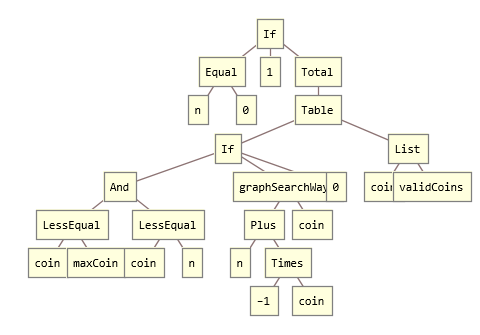

In [ ]:
(* 31 Coin Sums: use graph traversal (DFS) with memoization*)
(* learn functions:
    ClearAll[] 
    Memoization(:= ... =): store results to avoid recalculating for the same pair
    Table[]: loop over each coin in validCoins *)
ClearAll[graphSearchWays];
validCoins = {1, 2, 5, 10, 20, 50, 100, 200};
graphSearchWays[n_, maxCoin_] := graphSearchWays[n, maxCoin] =
  If[n == 0, 
          1, 
   Total[Table[If[coin <= maxCoin && coin <= n 
                  , graphSearchWays[n - coin, coin]
                  , 0], {coin, validCoins}] ]];

graphSearchWays[200, 200] (*calculate n of total pairs*)
TreeForm[ (*see logic structure*)
  If[n == 0, 1, 
  Total[Table[If[coin <= maxCoin && coin <= n, 
              graphSearchWays[n - coin, coin], 
              0], {coin, validCoins}]]]]

## PE 32

Math easy, coding hard. 
1. memoization use (:= ... )
2. gen number from digits using string, all possible combinations of digits where each digit be used only once
3. I tried numerically way, but computing time doubled
4. IntegerString[], Characters[]
5. Flatten[], flatten nested lists
6. Apply[] -> @@

In [4]:
#32 Pandigital Products
def checkPandigital(b, n):
	if (len(n) < b):
		return 0
	hash = [0] * b
	for i in range(len(n)):
		if (n[i] >= '0' and n[i] <= '9'):
			hash[ord(n[i]) - ord('0')] = 1
		else:
			if (ord(n[i]) - ord('A') <= b - 11):
			    hash[ord(n[i]) - ord('A') + 10] = 1
	for i in range(b):
		if (hash[i] == 0):
			return 0
	return 1
#cal
b = 13
n = "1298450376ABC"
if (checkPandigital(b, n)):
	print("Yes")
else:
	print("No")

Yes


In [ ]:
(* 32 Pandigital Products *)
(* Check if the concatenation of x, y, product forms a 1-9 pandigital number stringly*)
pandigitalQ[x_, y_, xy_] := 
  StringLength[ str=IntegerString[x] <> IntegerString[y] <> IntegerString[xy] ] == 9 && 
  Sort[Characters[str]] == Characters["123456789"] ; 

(* List all valid xy then sum *)
pandigitalProducts = DeleteDuplicates[
    Select[ Flatten[ Table[{x, y, x*y}, {x, 1, 99}, {y, 1, 9999}], 1 ]
          , pandigitalQ @@ # & ]
          [[All, 3]] ]

Total[pandigitalProducts]

{6952, 7852, 5796, 5346, 4396, 7254, 7632}
45228

## PE 33

> Methods & Process

- check for 2 digit numerators and denominators
    49/98=4/8, 3 left to go
- must have at least one common digit between numerator and denominator

In [ ]:
(* 33 Digit Cancelling Fractions *)

## PE 34

In [7]:
#34 Digit Factorials
def spefact(num):
    n=[num]
    output=list(map(int, str(n[0])))
    for number in output:
        fac=factorial(number)
        num-=fac
    if num==0:
        return True
    else:
        return False
list_num=[]
sum_num=0
for i in range(1850000):
    n=i+1
    if spefact(n):
        list_num.append(n)
        print(i)
for num in list_num:
    sum_num+=num
sum_num-=3
sum_num

0
1
144
40584


40730

In [6]:
#34 FP way
from math import factorial

factorials = {str(d): factorial(d) for d in range(10)} # Precompute factorials for digits 0-9
def is_digit_factorial(num):
    return num == sum(factorials[digit] for digit in str(num))

sum_num = sum(n for n in range(10, 1850000) if is_digit_factorial(n))
sum_num

40730

## PE 35

In [ ]:
#35 Circular Sums
def list_to_int(lst):
    n=''
    for item in lst:
        n=n+str(item)
    return int(n)

def circular_prime1(n):
    if prime(n)==False:
        return False
    else:
        list_prime=[]
        while len(list_prime)<length(n):
            output = list(map(int, str(n)))
            list_prime.append(n)
            if prime(n)==False:
                return False
            else:
                first=output[0]
                output.remove(first)
                output.append(first)
                n=list_to_int(output)
        for prime1 in list_prime:
            if prime(prime1)==False:
                return False
        return True

#cal
list_circ=[]
for i in range(999998):
    if i%100==0:
        print(i)
    n=i+2
    if circular_prime1(n)==True:
        list_circ.append(n)
list_circ

In [ ]:
#35 FP
from sympy import isprime  # how can we use Jonny-defined function here? 

def rotations(num):  # Function to get all rotations of a number
    s = str(num)
    return [int(s[i:] + s[:i]) for i in range(len(s))]

def is_circular_prime(num):
    return all(isprime(rot) for rot in rotations(num))

circular_primes = [n for n in range(2, 999999) if is_circular_prime(n)]
circular_primes 

In [ ]:
(*35 Circular Sums*) 
rotations[n_Integer] := Module[{digits = IntegerDigits[n]},
  FromDigits /@ NestList[RotateLeft, digits, Length[digits] - 1]]

isCircularPrime[n_Integer] := AllTrue[rotations[n], PrimeQ] (*if all rotations of a number are prime*)
circularPrimes = Select[Range[2, 999999], isCircularPrime]

{2, 3, 5, 7, 11, 13, 17, 31, 37, 71, 73, 79, 97, 113, 131, 197, 199, 311, 337, 373, 719, 733, 919, 971, 991, 1193, 1931, 3119, 3779, 7793, 7937, 9311, 9377, 11939, 19391, 19937, 37199, 39119, 71993, 91193, 93719, 93911, 99371, 193939, 199933, 319993, 331999, 391939, 393919, 919393, 933199, 939193, 939391, 993319, 999331}

## PE 36

In [8]:
#36 Double Base Palindromes
def binary(num):
    return int(bin(num)[2:])
list_num=[]
for i in range(1000000):
    if palin(i) and palin(binary(i)):
        list_num.append(i)
sum_num=0
for number in list_num:
    sum_num+=number
sum_num

NameError: name 'palin' is not defined

## PE 37

In [9]:
#37 Truncatable Primes
def truncatable(num):
    input=list(map(int, str(num)))
    inp=list_to_int(input)
    if prime(num)==True:
        while length(num)>1:
            if prime(num)==True and num!=1:
                output=list(map(int, str(num)))
                output.remove(output[0])
                num=list_to_int(output)
            else:
                return False
        while length(inp)>1:
            if is_prime(inp)==True and num!=1:
                output=list(map(int, str(inp)))
                output.remove(output[-1])
                inp=list_to_int(output)
            else:
                return False
        return True
    else:
        return False
#cal
list_trun=[]
n=10
while len(list_trun)<=10:
    if truncatable(n)==True:
        list_trun.append(n)
    n+=1
list_trun

NameError: name 'list_to_int' is not defined

## PE 38

> Methods & Process

- Already presented (1,2,3) and (1,2,3,4,5)->918273645, (1,2,3,4,5,6,7,8,9)->123456789, calculated 3 options and n>1
    left 2 options: (1,2,3,4,5,6,7) (1,2,3,4,5,6,7,8) 
- When multiplied by 1 and 2, the numbers will be 4-digit and 5-digit,
- when multiplied by 1, 2, 3 and 4, the numbers will be 2-digit for the first 3 and 3-digit for the last number,
- when multiplied by 1, 2, 3, 4, 5 and 6, the number will be 1-digit for the first 3 and 2-digit for the last 3 numbers.
- (1,2,3,4,5,6,7) and (1,2,3,4,5,6,7,8) not possible because too many numbers to multiply by.
9352*2=18704, 935218704 contains 0 is not answer

> Conclusion
- The biggest number in the lists is 9352, 9352*2=18704, but 935218704 is not 1 to 9 pandigital
- The next biggest number in the lists is 9327, 9327*2=18654, 932618654 is 1 to 9 pandigital.
Thus the answer should be 932618654.

In [ ]:
(* 38 Pandigital Multiples *)

lst=Select[Range[5000, 9999], 
  Function[n, 
    Length[Union[IntegerDigits[n], IntegerDigits[2 n]]] == 9 && 
    1000 <= 2 n < 100000
  ]
];
lst[[-2;;]] (*cannot contain 5 in number unless number afterwards is 6 or bigger*)

{9327, 9352}

## PE 39

In [ ]:
#39 Integer Right Triangles
# Ans:LCM(70,120)=840
pythagoreanTriplets2(1000)
pythagoreanTriplets3(1000)

## PE 40

In [ ]:
# 40 Champernonwne's Constant
constant=[]
n=1
while len(constant)<1000000:
    d=list(map(int,str(n)))
    for num in d:
        constant.append(num)
    n+=1
ans=constant[0]*constant[9]*constant[99]*constant[999]*constant[9999]*constant[99999]*constant[999999]
ans

## PE 41

In [12]:
#41 Pandigital Primes
import itertools

def isPrime(num):
    if num <= 1:
        return False
    elif num == 2 or num == 3:
        return True
    if num % 2 == 0 or num % 3 == 0:
        return False
    if not(num % 6 == 1) and not(num % 6 == 5):
        return False
    i = 5
    while i * i <= num:
        if num % i == 0 or num % (i + 2) == 0:
            return False
        i += 6
    return True

p = list(map("".join, itertools.permutations('1234567')))

max = 0
for n in p:
    if prime(int(n)) and max < int(n):
        max = int(n)

print(max)

7652413


## PE 42

In [ ]:
#42 Coded Triangle Numbers
import requests
response = requests.get("https://projecteuler.net/resources/documents/0042_words.txt")   # Send a GET request to the URL
content = response.text     # Read the content of the response
words = [name.strip('"') for name in content.split(',')]  # Split the content by comma and remove double quotes

def triangle(word):
    value=0
    values={'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 'K':11, 'L':12, 'M':13, 'N':14, 'O':15, 'P':16, 'Q':17, 'R':18, 'S':19, 'T':20, 'U':21, 'V':22, 'W':23, 'X':24, 'Y':25, 'Z':26}
    for letter in word:
        value+=values[letter]
    seq=triangular_seq(40)
    if value in seq:
        return True
    else:
        return False
tri_words=0
for word in words:
    if triangle(word):
        tri_words+=1
tri_words

## PE 45

In [1]:
(* 45 Triangular, Pentagonal, and Hexagonal 
    what I can learn?
    1) defining series 
    2) finding common items in lists using set theory: Intersection and Union*)
n=99999;
Tri = #(# + 1)/2 &  /@ Range[n];
Pen = #(3# - 1)/2 & /@ Range[n];
Hex = #(2# - 1) &   /@ Range[n];
Intersection[Tri,Pen,Hex]

SyntaxError: invalid syntax (Temp/ipykernel_12260/2372868435.py, line 1)

## PE 46

In [13]:
#46 Goldbach's Other Conjecture
import time
start=time.time()
# Define a function that tests if an odd composite integer can be represented as the sum of a prime and twice a square
def other_conjecture(n):
    """Assume n is an odd composite integer"""
    for i in range(3, n-1, 2):
        num=n-i
        number=num/2
        sqrt_num=int(number**1/2)+1
        if prime(i)==True:
            for j in range(1, sqrt_num):
                if i+2*(j**2)==n:
                    return True
    return False
# calculation
n=9
while True:
    if prime(n)==True:
        n+=2
    else:
        if other_conjecture(n)==True:
            n+=2
        else:
            break
print(n)
end=time.time()
print(end-start)

9
0.0


## PE 47

In [ ]:
(* 47 Distinct Primes Factors*)
lst=Table[FactorInteger[n],{n,134040,134050}];
lst1=Length/@lst;
ans=Select[Range[Length[lst1]],lst1[[#]]==4&];
ans1=Select[Range[3,Length[ans]],ans[[#]]==ans[[#-3]]+3&]
ans
(* learn 5 functions:
    Table[]
    Length[]
    FactorInteger[]
    Select[]
    Range[]*)

## PE 48

In [15]:
#48 Self Powers
n=1
sum_num=0
for i in range(1000):
    power=n**n
    sum_num+=power
    n+=1
sum_num

1000368199144695177095375011227646795567793680622934654583760988100234910747716194381428659099527845945869942643191290894720342979906407679647259860434238468038326040809691037615370376237713648510063115732951461774246705584266865759601815843666442832284556880313114548151539190975398485496645576513465858582712336401166221956188173449531674102688908321764663020306699770408625340766091595022791379368098369306375602813856646358773751558775213460225796579846583334007349358624342339332981334571237888809283103348760261360175950815609179464026871005243652109980863552142014242903434068560936573231079342194031864413918101238151056509267393515760392842472501391594073463001521843811073767021711026307504695733467897821866906648469828346607412967395801797791683609834722432241952845352564681868240369569566192825555323558078061997527689983848863374786789331581565252059172614339424600986143259233167583371070362625554531852054166117148858229508581589614337594463277554380518380921301218836327102231407332

In [ ]:
def primes():
    """Generate a list of 4-digit prime numbers excluding the known sequence."""
    num = []
    for i in range(1001, 9998, 2):
        if prime(i):
            num.append(i)
    # Exclude the specific prime sequence
    excluded = {1487, 4817, 8147}
    num = [n for n in num if n not in excluded]
    return num

def permutations(lst):
    """Find primes that have the same digit permutations."""
    # Sort digits of each number
    sorted_lst = [''.join(sorted(str(num))) for num in lst]
    
    # Dictionary to store primes by their sorted digit permutation
    perm_dict = {}
    for i, num in enumerate(lst):
        perm = sorted_lst[i]
        if perm in perm_dict:
            perm_dict[perm].append(num)
        else:
            perm_dict[perm] = [num]
    
    # Return only those lists with more than one permutation
    return {k: v for k, v in perm_dict.items() if len(v) > 1}

# Get primes and permutations
prime_list = primes()
permutations_dict = permutations(prime_list)

print(permutations_dict)


## PE 49

In [14]:
# 49 Prime Permutations
def primes():
    num=[]
    for i in range(1001,9998,2):
        if prime(i)==True:
            num.append(i)
    num.remove(1487)
    num.remove(4817)
    num.remove(8147)
    return num

def permutations(lst):
    for i in range(len(lst)):
        lst[i]=list(map(int,str(lst[i])))
        lst[i].sort()
    lst.sort()
    for i in range(len(lst)):
        print(lst[i])
    for i in range(1,len(lst)):
        if lst[i]!=lst[i-1]:
            lst.remove(lst[i-1])
    lst.remove(lst[-1])
    return lst

print(permutations(primes()))
print(primes())

[0, 0, 1, 3]
[0, 0, 1, 4]
[0, 0, 1, 7]
[0, 0, 1, 9]
[0, 0, 1, 9]
[0, 0, 2, 3]
[0, 0, 3, 4]
[0, 0, 3, 5]
[0, 0, 4, 7]
[0, 0, 5, 9]
[0, 0, 6, 7]
[0, 0, 7, 9]
[0, 0, 8, 9]
[0, 1, 1, 2]
[0, 1, 1, 2]
[0, 1, 1, 2]
[0, 1, 1, 3]
[0, 1, 1, 3]
[0, 1, 1, 3]
[0, 1, 1, 3]
[0, 1, 1, 3]
[0, 1, 1, 5]
[0, 1, 1, 5]
[0, 1, 1, 5]
[0, 1, 1, 6]
[0, 1, 1, 6]
[0, 1, 1, 6]
[0, 1, 1, 6]
[0, 1, 1, 8]
[0, 1, 1, 8]
[0, 1, 1, 8]
[0, 1, 1, 9]
[0, 1, 1, 9]
[0, 1, 1, 9]
[0, 1, 1, 9]
[0, 1, 1, 9]
[0, 1, 2, 4]
[0, 1, 2, 4]
[0, 1, 2, 5]
[0, 1, 2, 7]
[0, 1, 2, 8]
[0, 1, 2, 8]
[0, 1, 3, 3]
[0, 1, 3, 3]
[0, 1, 3, 3]
[0, 1, 3, 4]
[0, 1, 3, 4]
[0, 1, 3, 6]
[0, 1, 3, 6]
[0, 1, 3, 6]
[0, 1, 3, 7]
[0, 1, 3, 7]
[0, 1, 3, 7]
[0, 1, 3, 7]
[0, 1, 3, 9]
[0, 1, 3, 9]
[0, 1, 3, 9]
[0, 1, 3, 9]
[0, 1, 3, 9]
[0, 1, 3, 9]
[0, 1, 4, 5]
[0, 1, 4, 8]
[0, 1, 4, 9]
[0, 1, 4, 9]
[0, 1, 4, 9]
[0, 1, 4, 9]
[0, 1, 4, 9]
[0, 1, 5, 5]
[0, 1, 5, 5]
[0, 1, 5, 7]
[0, 1, 5, 7]
[0, 1, 5, 8]
[0, 1, 5, 8]
[0, 1, 5, 8]
[0, 1, 6, 7]
[0, 1, 6, 7]
[0, 1, 6, 9]

IndexError: list index out of range